In [1]:
import pandas as pd
import numpy as np

In [2]:
gas=pd.read_csv("gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gas1=gas.values
gas1

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [5]:
X=gas1[:,[0,1,2,3,4,5,6,8,9,10]]
Y=gas1[:,-4]
X

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=101)


In [8]:
from sklearn.preprocessing import MinMaxScaler


In [9]:
scaler=MinMaxScaler()
scaler.fit(x_train)



MinMaxScaler()

In [10]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[0.35890393, 0.40602285, 0.91801706, ..., 0.34107329, 0.03084967,
        0.48475958],
       [0.55162803, 0.59086189, 0.72785444, ..., 0.42819611, 0.02833486,
        0.43366477],
       [0.69430373, 0.53478712, 0.55215014, ..., 0.14847583, 0.15186537,
        0.33822331],
       ...,
       [0.29923532, 0.48494289, 0.94876603, ..., 0.77514199, 0.00101504,
        0.41400706],
       [0.64399376, 0.35825545, 0.50904718, ..., 0.04705791, 0.10100297,
        0.36756316],
       [0.3486443 , 0.24340602, 0.81637941, ..., 0.34416412, 0.00787964,
        0.54170062]])

In [13]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


In [14]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# add nodes for prediction
model.add(Dense(1))


In [15]:
model.compile(optimizer='rmsprop',loss='mse')


In [16]:
# Fit the model
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
353/353 [==============================] - 5s 6ms/step - loss: 16051.8262
Epoch 2/250
353/353 [==============================] - 2s 5ms/step - loss: 2323.7393
Epoch 3/250
353/353 [==============================] - 2s 5ms/step - loss: 40.1077
Epoch 4/250
353/353 [==============================] - 2s 6ms/step - loss: 19.8900
Epoch 5/250
353/353 [==============================] - 2s 5ms/step - loss: 16.2928
Epoch 6/250
353/353 [==============================] - 2s 6ms/step - loss: 13.7820
Epoch 7/250
353/353 [==============================] - 2s 7ms/step - loss: 11.7809
Epoch 8/250
353/353 [==============================] - 2s 6ms/step - loss: 9.8926
Epoch 9/250
353/353 [==============================] - 2s 5ms/step - loss: 8.2782
Epoch 10/250
353/353 [==============================] - 3s 8ms/step - loss: 6.8256
Epoch 11/250
353/353 [==============================] - 4s 13ms/step - loss: 5.6294
Epoch 12/250
353/353 [==============================] - 4s 12ms/step - loss: 4.5627

353/353 [==============================] - 2s 5ms/step - loss: 0.8498
Epoch 100/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8559
Epoch 101/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8647
Epoch 102/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8687
Epoch 103/250
353/353 [==============================] - 2s 6ms/step - loss: 0.8497
Epoch 104/250
353/353 [==============================] - 2s 6ms/step - loss: 0.8492
Epoch 105/250
353/353 [==============================] - 2s 6ms/step - loss: 0.8538
Epoch 106/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8348
Epoch 107/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8496
Epoch 108/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8474
Epoch 109/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8440
Epoch 110/250
353/353 [==============================] - 2s 5ms/step - loss: 0.8430
Epoch 

353/353 [==============================] - 1s 4ms/step - loss: 0.8049
Epoch 197/250
353/353 [==============================] - 2s 6ms/step - loss: 0.8004
Epoch 198/250
353/353 [==============================] - 2s 6ms/step - loss: 0.8043
Epoch 199/250
353/353 [==============================] - 2s 6ms/step - loss: 0.8068
Epoch 200/250
353/353 [==============================] - 3s 7ms/step - loss: 0.8017
Epoch 201/250
353/353 [==============================] - 3s 8ms/step - loss: 0.7991
Epoch 202/250
353/353 [==============================] - 3s 7ms/step - loss: 0.8012
Epoch 203/250
353/353 [==============================] - 3s 8ms/step - loss: 0.8086
Epoch 204/250
353/353 [==============================] - 3s 8ms/step - loss: 0.7954
Epoch 205/250
353/353 [==============================] - 2s 5ms/step - loss: 0.7804
Epoch 206/250
353/353 [==============================] - 2s 6ms/step - loss: 0.8027
Epoch 207/250
353/353 [==============================] - 2s 7ms/step - loss: 0.8018
Epoch 

<AxesSubplot:>

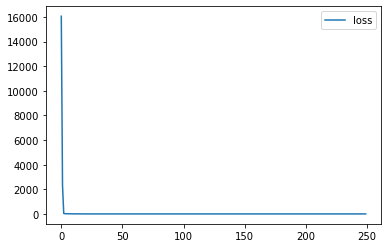

In [17]:
%matplotlib inline
import matplotlib as plot
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [18]:
pred = model.predict(x_test)

In [19]:
test_score = model.evaluate(x_test,y_test,verbose=0)
test_score

0.7555868625640869

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [21]:
mean_absolute_error(pred,y_test)


0.6609816775220506

In [22]:
mean_squared_error(pred,y_test)


0.7555866635835957

In [23]:
import matplotlib.pyplot as plt


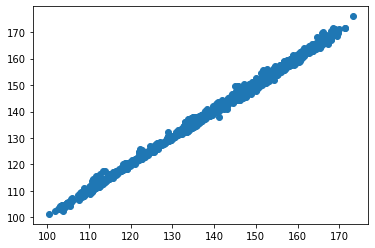

In [24]:
plt.scatter(y_test,pred)
